In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm


### 1. Get-to-know

In [2]:
# loading the data from csv file to a Panda Dataframe
path = '/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/ParkinsonProject/'
p_data = pd.read_csv(path + 'parkinsons.csv')

# printing the first 5 rows of the dataframe
p_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# checking for missing values in each column
p_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
# distribution of target variable 
p_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [5]:
p_data['status'].value_counts().index

Int64Index([1, 0], dtype='int64')

Text(0, 0.5, 'status')

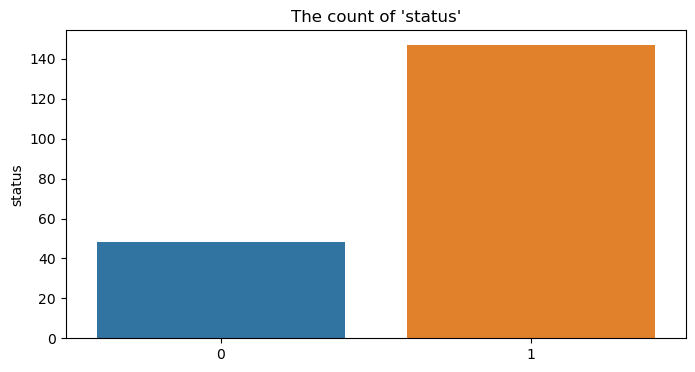

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title("The count of 'status'")

# Bar chart
sns.barplot(x=p_data['status'].value_counts().index, y=p_data['status'].value_counts())

# Add label for vertical axis
plt.ylabel("status")

In [7]:
# grouping the data based on the target variable
round(p_data.groupby('status').mean(), 3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.938,223.637,145.207,0.004,0.0,0.002,0.002,0.006,0.018,0.163,...,0.013,0.029,0.011,24.679,0.443,0.696,-6.759,0.160,2.154,0.123
1,145.181,188.441,106.894,0.007,0.0,0.004,0.004,0.011,0.034,0.321,...,0.028,0.053,0.029,20.974,0.517,0.725,-5.333,0.248,2.456,0.234


### 2. Clean data
- Our data has not any missing value but we have to deal with outliers.

In [8]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

In [9]:
def remove_upper_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] < (Q3 + 1.5*IQR)]

def remove_lower_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] > (Q1 - 1.5*IQR)]

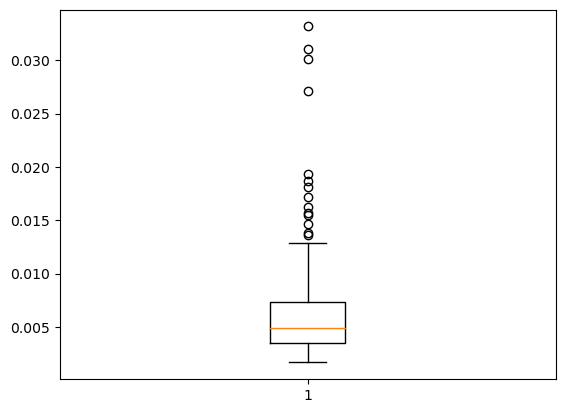

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(p_data['MDVP:Jitter(%)'])
plt.show()

In [11]:
outliers_of(p_data, 'MDVP:Jitter(%)')

The number of upper outliers= 14

The number of lower outliers= 0

The percentage of outliers= 7.199999999999999%


In [12]:
p_data = remove_upper_outliers(p_data, 'MDVP:Jitter(%)')
p_data.shape

(181, 24)

In [13]:
outliers_of(p_data, 'MDVP:Jitter(%)')

The number of upper outliers= 2

The number of lower outliers= 0

The percentage of outliers= 1.0999999999999999%


### 3. Refine data
#### Selecting 9 features for the Model:
- 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
'RPDE', 'DFA', 'spread1', 'spread2', 'D2'
#### Separating the features & Target

In [14]:
#X = p_data.drop(columns=['name', 'status'], axis=1)
X = p_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
'RPDE', 'DFA', 'spread1', 'spread2', 'D2']]
y = p_data['status']

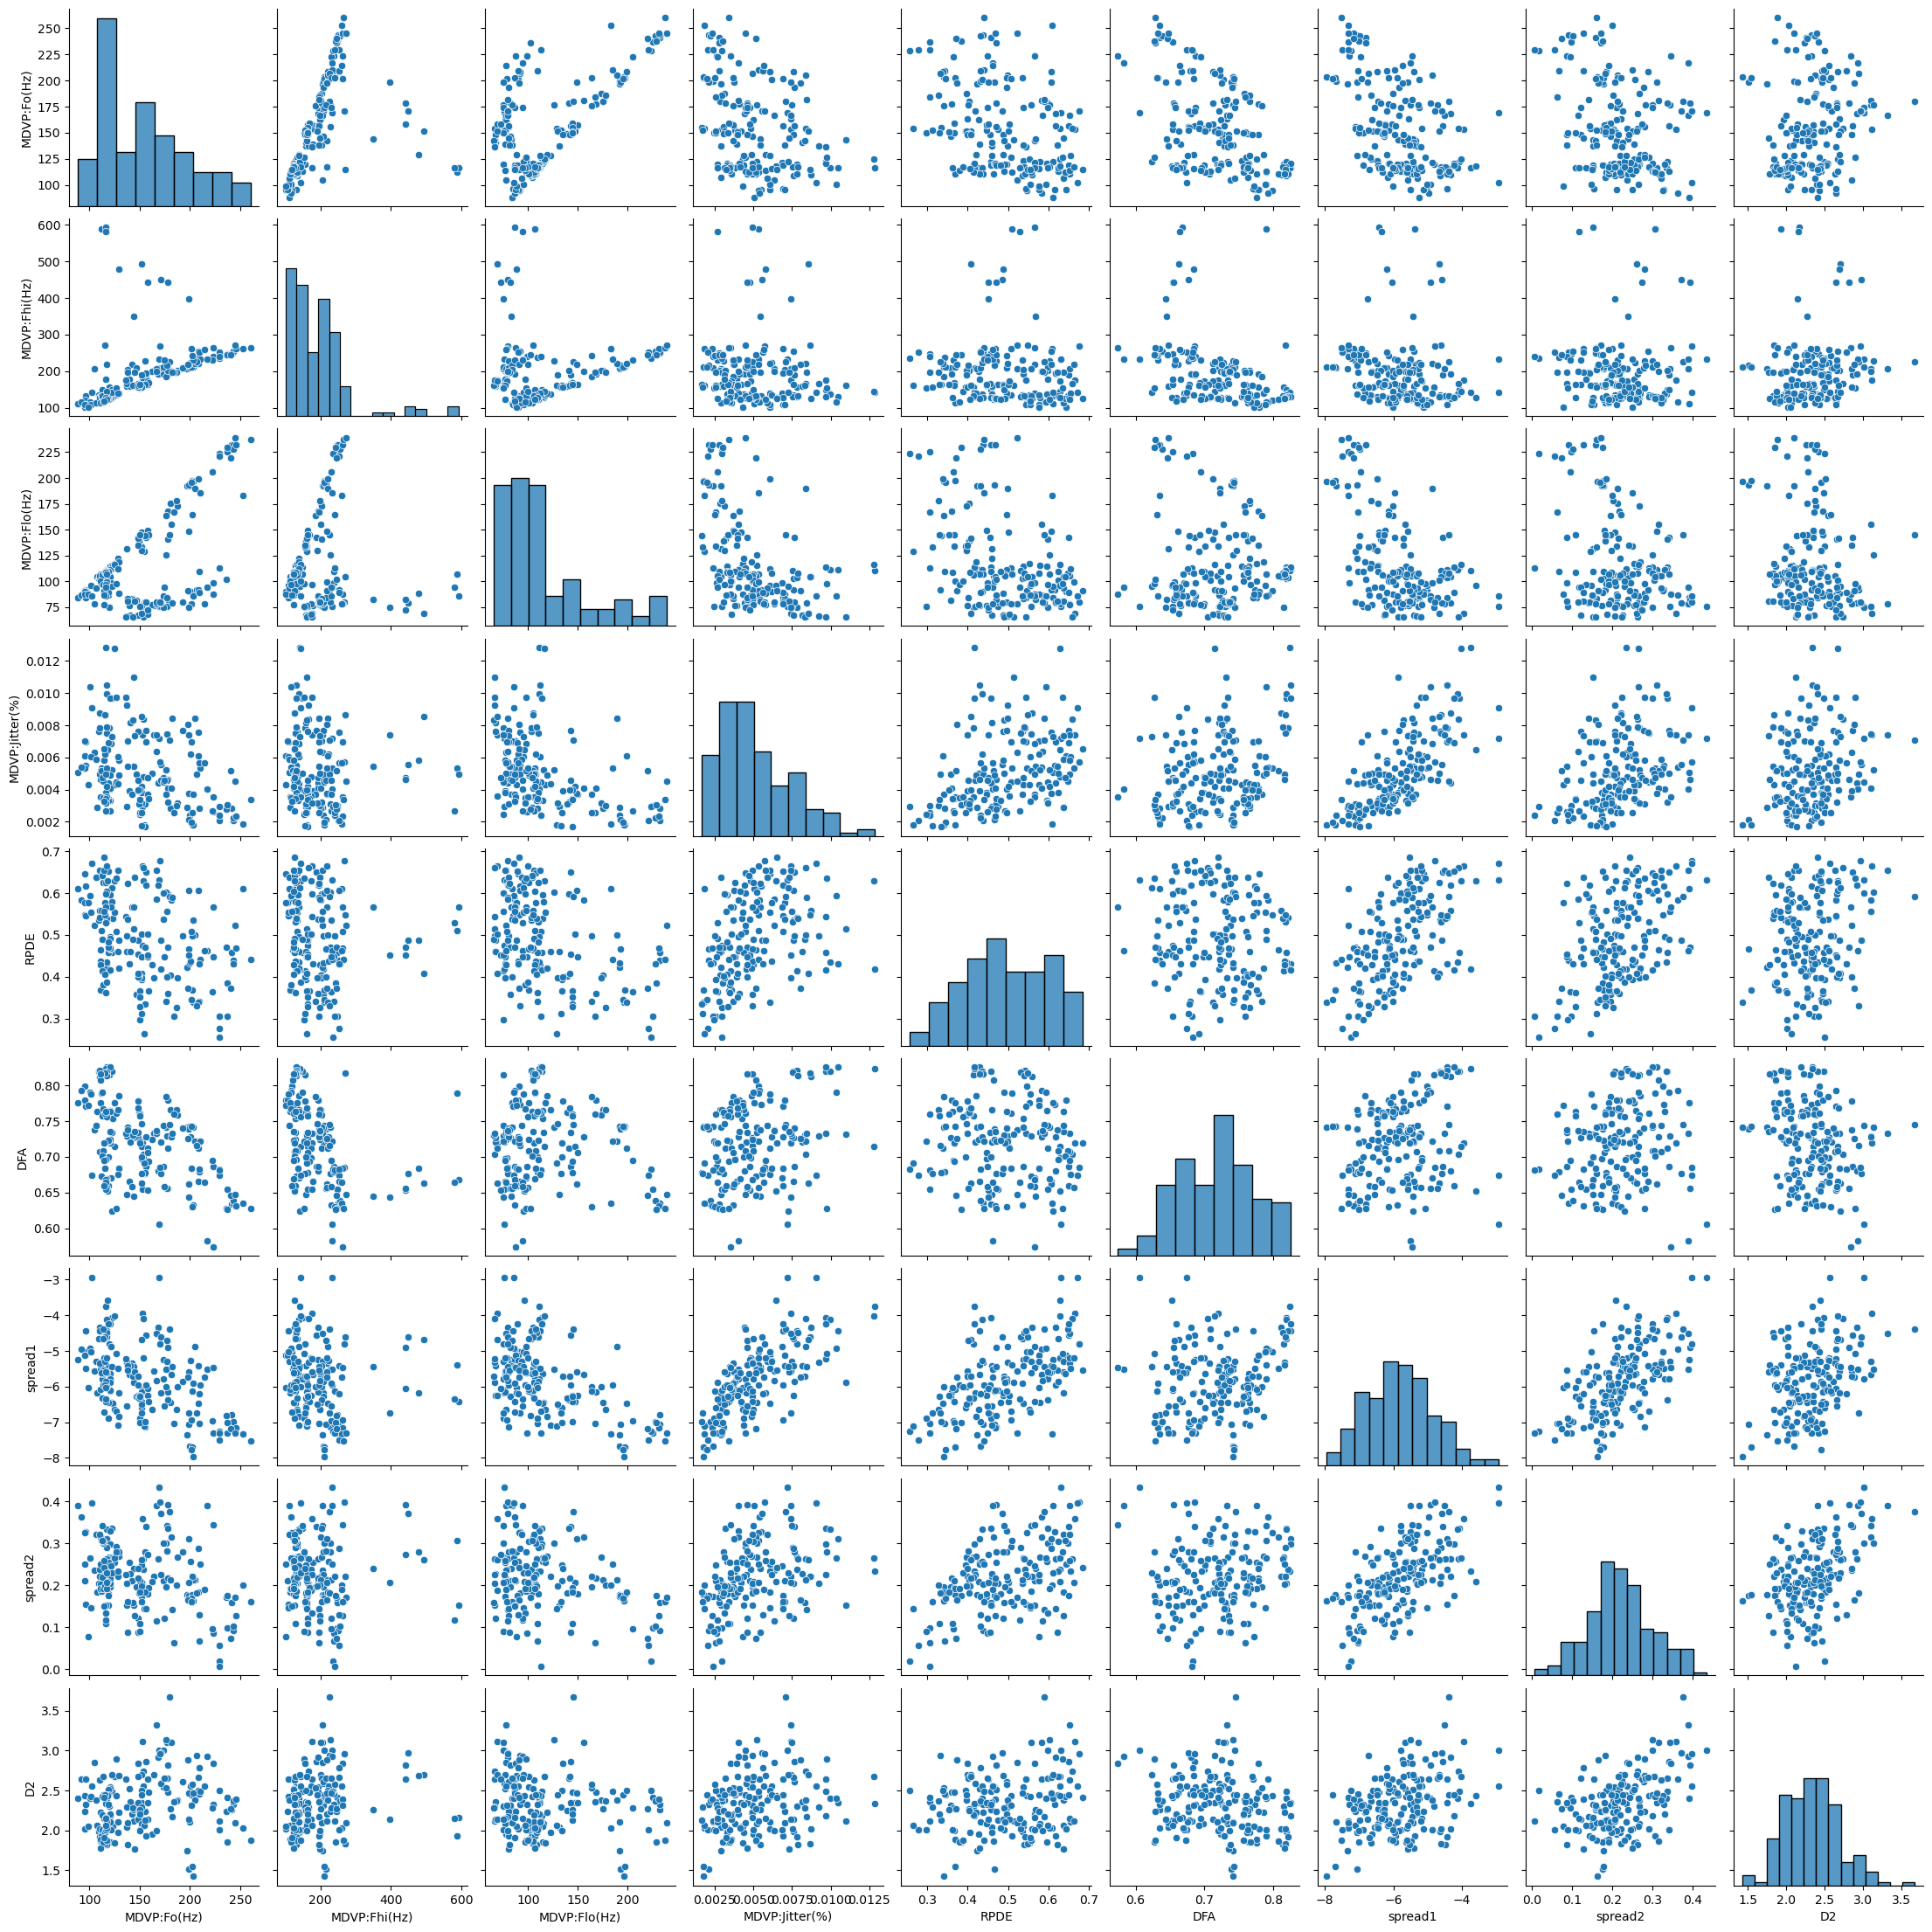

In [15]:
sns.pairplot(X)

In [16]:
len(X.columns)

9

## Data Standardization
### 1. Log Normalization
- If we want to find out whether or not we should use Log Normalization, we should calculate the variance of variables, then compare them.  

In [17]:
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'MDVP:Fo(Hz)'= 
				1767.666
The variance of 'MDVP:Fhi(Hz)'= 
				7298.287
The variance of 'MDVP:Flo(Hz)'= 
				1910.018
The variance of 'MDVP:Jitter(%)'= 
				0.0
The variance of 'RPDE'= 
				0.011
The variance of 'DFA'= 
				0.003
The variance of 'spread1'= 
				0.953
The variance of 'spread2'= 
				0.007
The variance of 'D2'= 
				0.127


In [18]:
X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']] = np.log(X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']])
#X

/var/folders/wk/mhz4kph510j0rjqvm8gg8nym0000gn/T/ipykernel_59406/1552775739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']] = np.log(X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']])


- Check the variances again.

In [19]:
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'MDVP:Fo(Hz)'= 
				0.071
The variance of 'MDVP:Fhi(Hz)'= 
				0.124
The variance of 'MDVP:Flo(Hz)'= 
				0.112
The variance of 'MDVP:Jitter(%)'= 
				0.0
The variance of 'RPDE'= 
				0.011
The variance of 'DFA'= 
				0.003
The variance of 'spread1'= 
				0.953
The variance of 'spread2'= 
				0.007
The variance of 'D2'= 
				0.127


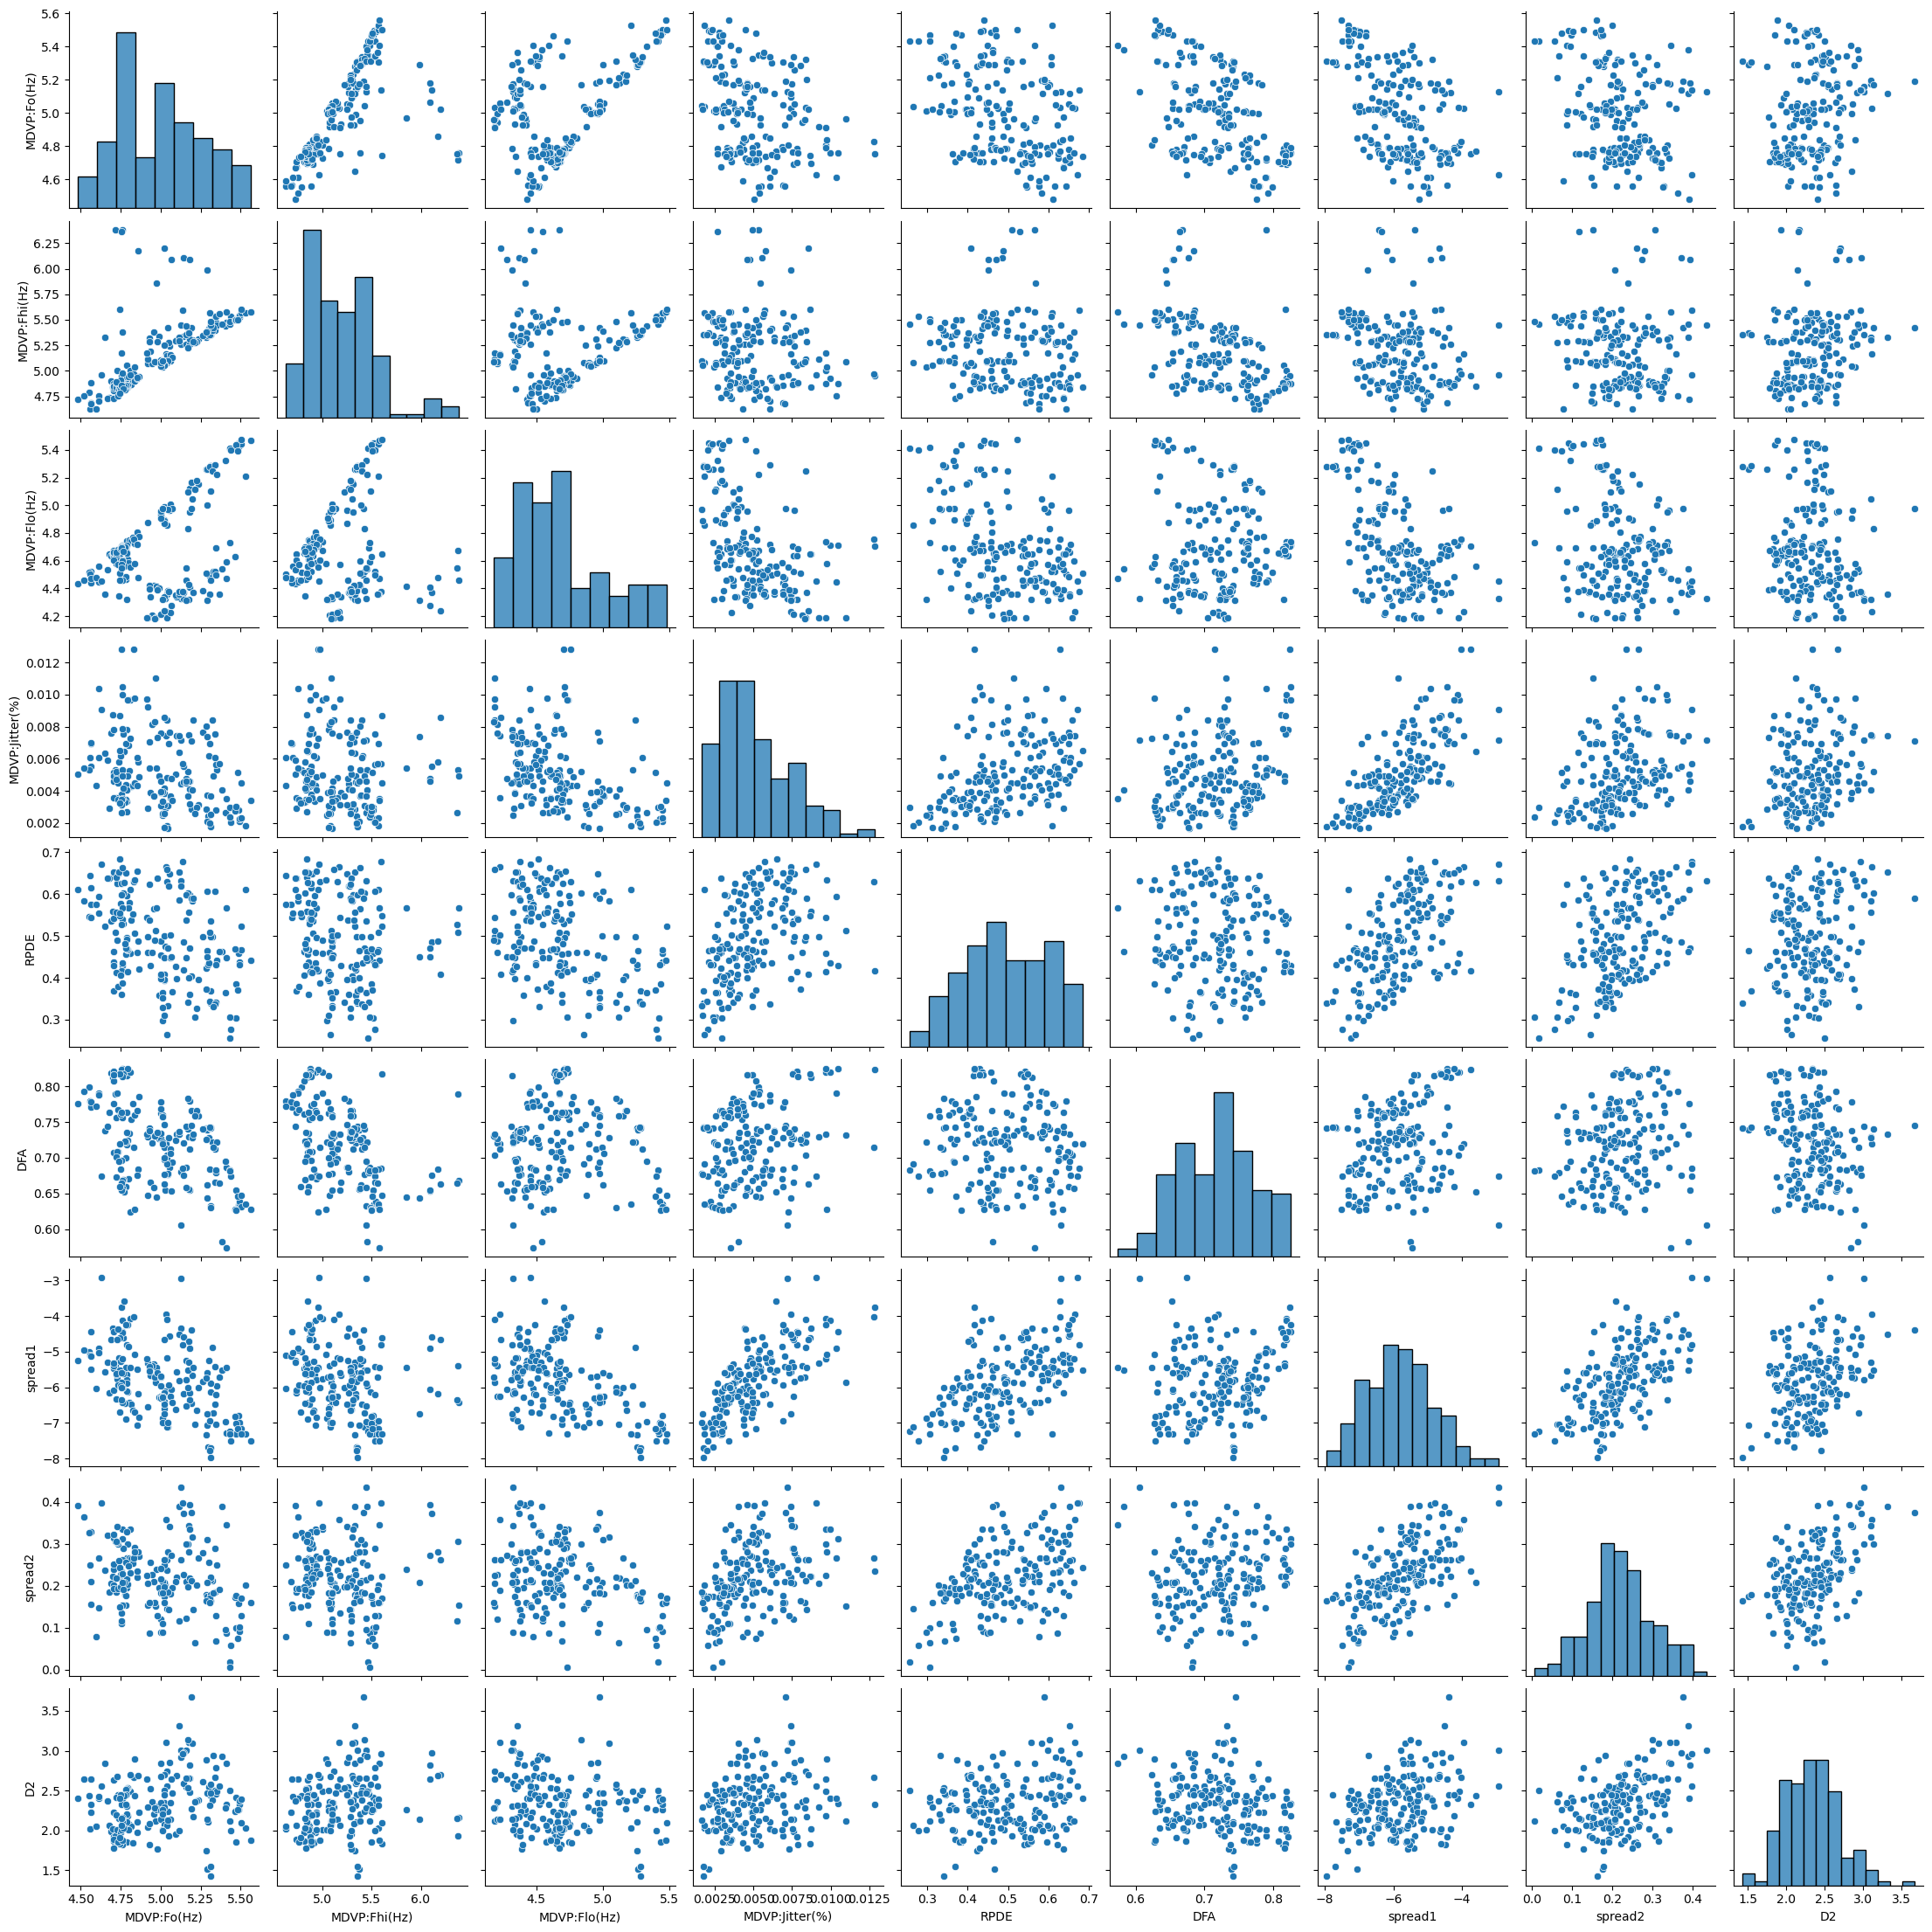

In [20]:
sns.pairplot(X)

<AxesSubplot:ylabel='Count'>

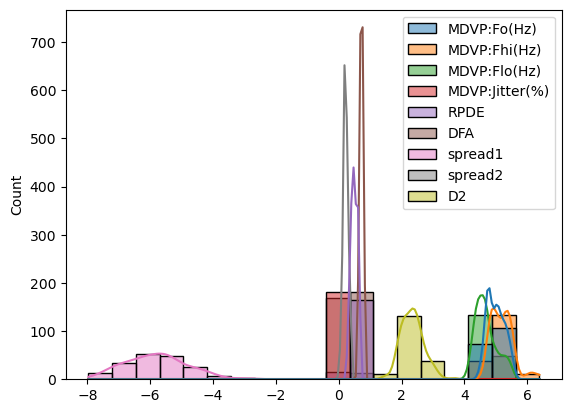

In [21]:
import seaborn as sns
sns.histplot(data=X, kde=True)

### 2. Feature Scaling
- applied for K-Means, K-Nearest-Neighbor, PCA, Gradient Descent
- not used for Naive Bayes, Linear Discriminant Analysis, Tree-Based models

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)

In [23]:
df = pd.DataFrame(X_transformed, columns=X.columns)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
0,-0.798320,-0.393734,-1.113359,1.187357,-0.759166,1.761173,1.029173,0.570661,-0.107053
1,-0.723382,-0.555095,0.136023,1.993664,-0.338844,1.838180,1.786977,1.427910,0.414297
2,-0.903821,-0.913197,0.075849,2.352996,-0.613400,1.943020,1.409032,1.125030,0.007718
3,-0.904015,-0.769802,0.070770,2.120745,-0.564457,1.832981,1.743523,1.410011,0.185692
4,-0.925475,-0.690038,0.051588,3.378409,-0.734348,1.910225,2.123241,0.174101,-0.020623


In [24]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')

<AxesSubplot:title={'center':'After Scaling'}, xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

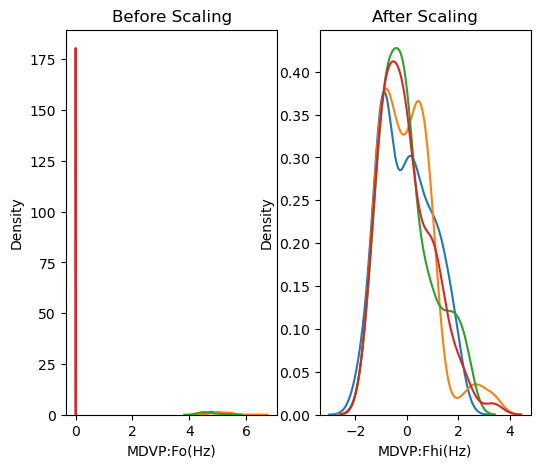

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['MDVP:Fo(Hz)'], ax=ax1)
sns.kdeplot(X['MDVP:Fhi(Hz)'], ax=ax1)
sns.kdeplot(X['MDVP:Flo(Hz)'], ax=ax1)
sns.kdeplot(X['MDVP:Jitter(%)'], ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(df['MDVP:Fo(Hz)'].values, ax=ax2)
sns.kdeplot(df['MDVP:Fhi(Hz)'], ax=ax2)
sns.kdeplot(df['MDVP:Flo(Hz)'], ax=ax2)
sns.kdeplot(df['MDVP:Jitter(%)'], ax=ax2)

## Model Training
#### Splitting the data to training data & valid data

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)


### 1. Create model

#### Support Vector Machine

In [27]:
model = svm.SVC(kernel='linear')

In [28]:
# training the SVM model with training data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# get predicted prices on validation data
y_pred = model.predict(X_valid)

### 2. Validate model

In [30]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_valid, y_pred))

0.16216216216216217


### 3. Evaluate model
#### Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score
# accuracy score on the valid data
print(f'Accuracy score of valid data: {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data: {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data: 0.8378378378378378
Accuracy score of training data: 0.8819444444444444


In [32]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 83.78378378378379%
The train score of training data= 88.19444444444444%


#### Performance Metric

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[10  6]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.78      1.00      0.88        21

    accuracy                           0.84        37
   macro avg       0.89      0.81      0.82        37
weighted avg       0.87      0.84      0.83        37



#### Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.7777777777777778
Recall= 1.0


#### Building a Predictive System

In [35]:
X.iloc[111:113]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
116,5.063980,6.092569,4.275944,0.00476,0.450798,0.653823,-6.051233,0.273280,2.640798
117,5.140236,6.109796,4.369853,0.00555,0.486738,0.676023,-4.597834,0.372114,2.975889


In [36]:
input_data = (5.34003, 5.395058, 5.293405, 0.00609, 0.338097, 0.712466,	-6.471427, 0.184378, 2.502336)

# chaning input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinson Disease")
else:
    print("The Person has Parkinson Disease")  

[1]
The Person has Parkinson Disease


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
